# Assignment 1

In [1]:
# Importing Dependencies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')
import torch
import torch.distributions as dist

In [3]:
import torch
import torch.optim as optim

# Define the function to be minimized
def func(x):
    return (x - 2)**2

# Initialize the variable to optimize (parameter)
x = torch.tensor(0.1, requires_grad=True)

# Define the optimizer (using stochastic gradient descent)
optimizer = optim.SGD([x], lr=0.1)  # lr is the learning rate

# Perform optimization
for _ in range(50):  # Number of optimization steps
    optimizer.zero_grad()  # Zero out gradients
    loss = func(x)  # Compute the loss
    loss.backward()  # Compute gradients
    optimizer.step()  # Update the parameter using the gradients

# The optimized value of x is the minimum point of the function
min_x = x.item()
min_value = func(x).item()

print("Optimized x:", min_x)
print("Minimum value of the function:", min_value)

Optimized x: 1.999972939491272
Minimum value of the function: 7.32271132619644e-10


---

### Q1

Optimise the following function using torch autograd and gradient descent, f(θ) = (θ₀ - 2)² + (θ₁ - 3)². In addition to finding the optima, you need to show the convergence plots. [0.5 marks]

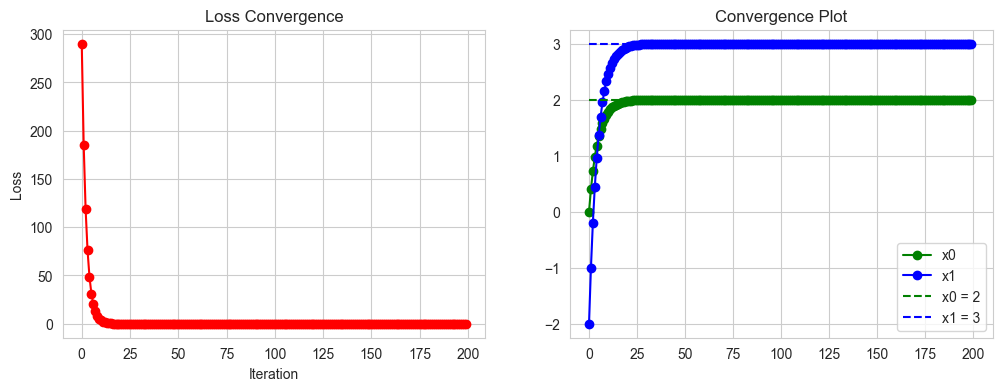

In [11]:
# Defining the function to be optimized
def loss_fun(x):
    return 10*((x[0]-2)**2 + (x[1]-3)**2)

# The varaiable tensor, whose operations are to be stored, (initial value set to be (-1,-1.5))
x = torch.tensor([-0.0, -2.0], requires_grad=True)

# Gradient Descent Hyperparameters
num_iterations = 200
learning_rate = 0.01

xs = []
losses = []

# Gradient Descent
for i in range(num_iterations):
    loss = loss_fun(x)
    # We want to calculate the gradient of loss scalar with respect to all tensors with requires_grad=True.
    loss.backward()

    xs.append(x.detach().numpy().copy()) # Cannot, convert a grad tensor to numpy directly
    losses.append(loss.item())           # Gives the direct value

    # Gradient Descent Step, Could have use torch.no_grad() as well
    x.data = x.data - learning_rate * x.grad

    # Manually zero the gradients after updating weights, (otherwise they accumulate)
    x.grad.zero_()

# Plotting the loss curve
fig, ax = plt.subplots(1,2, figsize=(12,4))
ax[0].plot(losses, marker='o', color = 'red')
ax[0].set_xlabel('Iteration')
ax[0].set_ylabel('Loss')
ax[0].set_title('Loss Convergence')

# Plotting the path taken by theta during optimization
ax[1].plot([x[0] for x in xs], marker='o', color = "green", label = "x0")
ax[1].plot([x[1] for x in xs], marker='o', color = "blue", label = "x1")
ax[1].hlines(2, 0, len(xs), color = "green", linestyle = "dashed", label = "x0 = 2")
ax[1].hlines(3, 0, len(xs), color = "blue", linestyle = "dashed", label = "x1 = 3")
ax[1].legend()
# ax[1].set_xlabel('x0')
# ax[1].set_ylabel('x1')
ax[1].set_title('Convergence Plot')
plt.show()

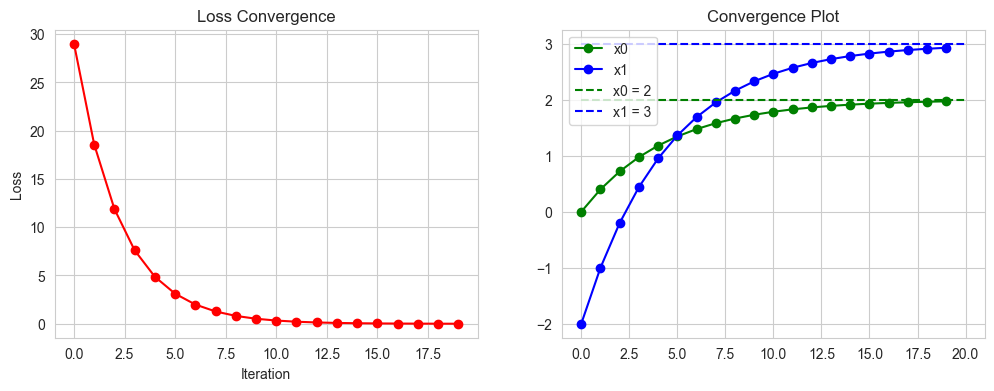

In [3]:
# Defining the function to be optimized
def loss_fun(x):
    return (x[0]-2)**2 + (x[1]-3)**2

# The varaiable tensor, whose operations are to be stored, (initial value set to be (-1,-1.5))
x = torch.tensor([-0.0, -2.0], requires_grad=True)

# Gradient Descent Hyperparameters
num_iterations = 20
learning_rate = 0.1

xs = []
losses = []

# Gradient Descent
for i in range(num_iterations):
    loss = loss_fun(x)
    # We want to calculate the gradient of loss scalar with respect to all tensors with requires_grad=True.
    loss.backward()

    xs.append(x.detach().numpy().copy()) # Cannot, convert a grad tensor to numpy directly
    losses.append(loss.item())           # Gives the direct value

    # Gradient Descent Step, Could have use torch.no_grad() as well
    x.data = x.data - learning_rate * x.grad

    # Manually zero the gradients after updating weights, (otherwise they accumulate)
    x.grad.zero_()

# Plotting the loss curve
fig, ax = plt.subplots(1,2, figsize=(12,4))
ax[0].plot(losses, marker='o', color = 'red')
ax[0].set_xlabel('Iteration')
ax[0].set_ylabel('Loss')
ax[0].set_title('Loss Convergence')

# Plotting the path taken by theta during optimization
ax[1].plot([x[0] for x in xs], marker='o', color = "green", label = "x0")
ax[1].plot([x[1] for x in xs], marker='o', color = "blue", label = "x1")
ax[1].hlines(2, 0, len(xs), color = "green", linestyle = "dashed", label = "x0 = 2")
ax[1].hlines(3, 0, len(xs), color = "blue", linestyle = "dashed", label = "x1 = 3")
ax[1].legend()
# ax[1].set_xlabel('x0')
# ax[1].set_ylabel('x1')
ax[1].set_title('Convergence Plot')
plt.show()

In [4]:
print("Optima: ",x)
print("Final Loss; ", "{:.5f}".format(loss.item()))

Optima:  tensor([1.9769, 2.9424], requires_grad=True)
Final Loss;  0.00602


TODO: Make a 2-D contour plot with the convergence points (can also add a slider for iterations or lr)

---

### Q2

Generate some data (100 data points) using a univariate Normal distribution with loc=2.0 and scale=4.0.

a) Plot a 2d contour plot showing the Likelihood or the Log-Likelihood as a function of loc and scale. Please label all the axes including the colorbar. [1 mark]

b) Find the MLE parameters for the loc and scale using gradient descent. Plot convergence plot as well. [1 mark]

c) Redo the above question but learn log(scale) instead of scale and then finally transform to learn scale. What can you conclude? Why is this transformation useful? [0.5 mark]

MLE of mean:  2.9060876  MLE of std:  3.5198097


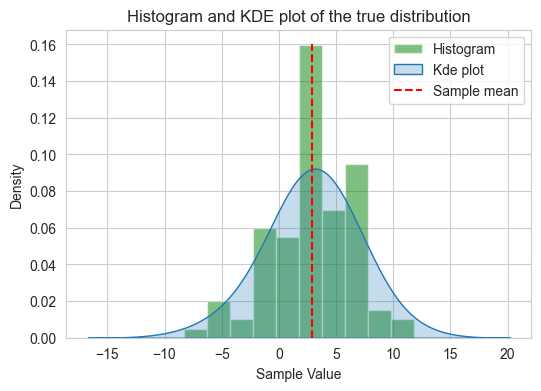

In [55]:
torch.manual_seed(17)

# Generating data from a univariate Normal Distribution
true_loc = 2.0
true_scale = 4.0

true_dist = dist.Normal(true_loc, true_scale)
true_samples = true_dist.sample((100,))
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.hist(true_samples.numpy(),density=True, color = "green", alpha = 0.5, label = "Histogram")
sns.kdeplot(true_samples.numpy(), bw_adjust=2.0, fill=True, ax=ax, label = "Kde plot")
ax.set_title("Histogram and KDE plot of the true distribution")
ax.set_xlabel("Sample Value")

## Sample mean and variance MLE
mean_mle = np.mean(true_samples.numpy())
std_mle = np.std(true_samples.numpy())
ax.vlines(mean_mle, ymin = 0.0, ymax = 0.16, color="red", linestyle = "--", label="Sample mean")
print("MLE of mean: ", mean_mle, " MLE of std: ", std_mle)
ax.legend()
plt.show()

In [43]:
# Likelihood function for normally distributed data
def likelihood(data, loc, scale):
    dist = torch.distributions.Normal(loc, scale)
    return dist.log_prob(data).sum().exp()

def log_likelihood(data, loc, scale):
    dist = torch.distributions.Normal(loc, scale)
    # return dist.log_prob(data).mean()
    return dist.log_prob(data).mean()

# Creating a grid of loc and scale values
loc_range = torch.linspace(0, 4, 100)
scale_range = torch.linspace(1.0, 8, 100)

def plot_cp(loc_range, scale_range):
    loc_grid, scale_grid = torch.meshgrid(loc_range, scale_range)
    # Calculate the log-likelihood and likelihood values on the grid
    log_likelihood_grid = torch.zeros_like(loc_grid)
    likelihood_grid = torch.zeros_like(loc_grid)
    for i in range(len(loc_range)):
        for j in range(len(scale_range)):
            log_likelihood_grid[i, j] = log_likelihood(true_samples, loc_grid[i, j], scale_grid[i, j])
            likelihood_grid[i, j] = likelihood(true_samples, loc_grid[i, j], scale_grid[i, j])

    # Plot the contour plot of the log-likelihood
    fig, ax = plt.subplots(1, 2, figsize=(14, 5))
    contour = ax[0].contourf(loc_grid, scale_grid, log_likelihood_grid, levels=20, cmap='viridis')
    mean_contour = ax[1].contourf(loc_grid, scale_grid, likelihood_grid, levels=20, cmap='viridis')
    # Markers
    ax[0].plot(true_loc, true_scale, 'r*', markersize=15, label = "true"); 
    ax[1].plot(true_loc, true_scale, 'r*', markersize=15, label = "true")
    ax[0].plot(mean_mle, std_mle, 'w*', markersize=15, label = "mle"); 
    ax[1].plot(mean_mle, std_mle, 'w*', markersize=15, label = "mle")
    # Contours
    plt.colorbar(contour, label='Log-Likelihood')
    plt.colorbar(mean_contour, label='Likelihood')
    # Labels
    ax[0].set_xlabel('loc'); ax[1].set_xlabel('loc')
    ax[0].set_ylabel('scale'); ax[1].set_ylabel('scale')
    ax[0].set_title('Contour Plot of Log-Likelihood')
    ax[1].set_title('Contour Plot of Likelihood')
    ax[0].legend(); ax[1].legend()
    plt.show()

### a) Contour Plot

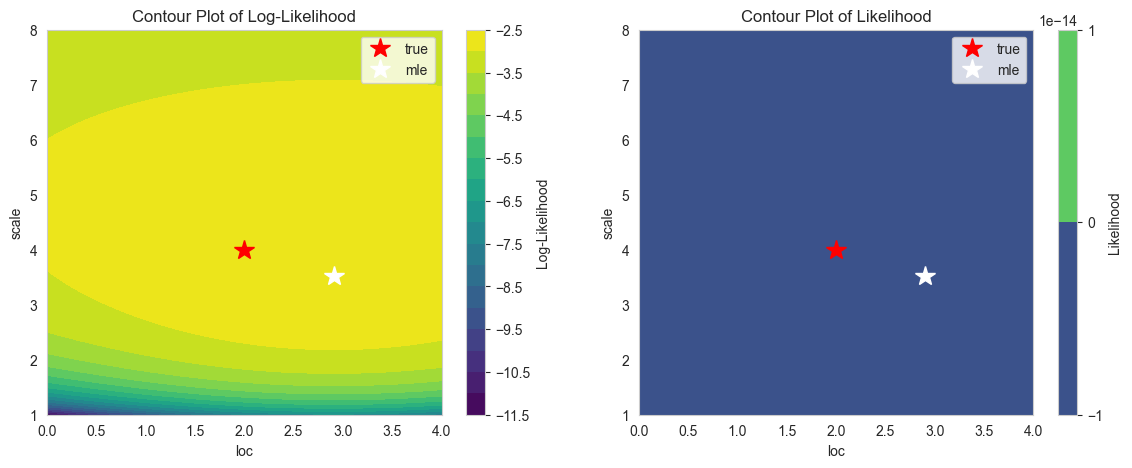

In [14]:
# Creating a grid of loc and scale values
loc_range = torch.linspace(0, 4, 100)
scale_range = torch.linspace(1.0, 8, 100)
plot_cp(loc_range, scale_range)

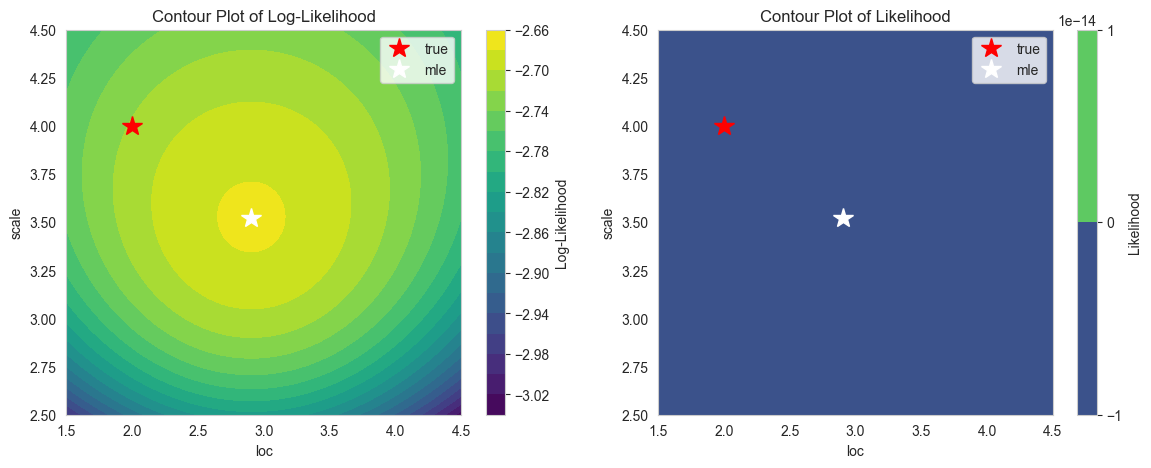

In [15]:
# Creating a grid of loc and scale values
loc_range = torch.linspace(1.5, 4.5, 100)
scale_range = torch.linspace(2.5, 4.5, 100)
plot_cp(loc_range, scale_range)

### b) Gradient Descent Conclusions

We used a learing rate of 0.1 initially but the loss was not decreasing. So we reduced the learning rate to 0.01 and the loss started decreasing. We also tried with 0.001 but the loss was decreasing very slowly. So we decided to go with 0.01 as the learning rate.

We used a learing rate fo 0.1 initially, but the parameter has a big jump (as the inital point (0.0, 0.5) is of high gradient), then it moved so far away that the gradients dropped to zero.

So, we reduced the learining rate to 0.005, and the parameter moved slowly, and the loss decreased, but it was not converging to the expected value, as the gradients had grown very small (at high scales (>3), the log_likelihood becomes very similar). Thus the convergence became very slow.

One way to solve this is to use multiple starting points, but it still does not mitigate the problem of slow convergence due to low values of gradients.

In [56]:
# Defining the function to be optimized
data = true_samples
def loss_fun(x):
    dist = torch.distributions.Normal(loc = x[0], scale = x[1])
    # return -dist.log_prob(data).mean()
    return -dist.log_prob(data).mean()

# The varaiable tensor, whose operations are to be stored
x = torch.tensor([0.0, 0.5])

def optimiser(loss_fun, x_init, learning_rate, num_iterations):
    xs = []
    losses = []
    x = x_init.clone().requires_grad_(True)
    for i in range(num_iterations):
        loss = loss_fun(x)
        loss.backward()
        xs.append(x.detach().numpy().copy())
        losses.append(loss.item())
        x.data = x.data - learning_rate * x.grad
        x.grad.zero_()
    return xs, losses

def plot_path(lr1, lr2, num1, num2, x_start, loss_fun= loss_fun,marker = None,loc_range = None, scale_range = None):
    xs, losses = optimiser(loss_fun, x_init = x_start, learning_rate = lr1, num_iterations = num1)
    xs2, losses2 = optimiser(loss_fun, x_init = x_start, learning_rate = lr2, num_iterations = num2)

    if loc_range == None:
        loc_range = torch.linspace(0, 4, 100)
    if scale_range == None:
        scale_range = torch.linspace(0.5, 18, 100)
    loc_grid, scale_grid = torch.meshgrid(loc_range, scale_range)

    log_likelihood_grid = torch.zeros_like(loc_grid)
    for i in range(len(loc_range)):
        for j in range(len(scale_range)):
            log_likelihood_grid[i, j] = log_likelihood(true_samples, loc_grid[i, j], scale_grid[i, j])

    # Plotting the loss curve
    fig, ax = plt.subplots(2,2, figsize=(12,8))

    contour = ax[0,0].contourf(loc_grid, scale_grid, log_likelihood_grid, levels=20, cmap='viridis')
    contour2 = ax[0,1].contourf(loc_grid, scale_grid, log_likelihood_grid, levels=20, cmap='viridis')
    plt.colorbar(contour, label='Log-Likelihood')
    plt.colorbar(contour2, label='Log-Likelihood')

    # Plotting the path taken by theta during optimization
    ax[0,0].plot([x[0] for x in xs], [x[1] for x in xs], marker='o', markersize=5, color = "red")
    ax[0,1].plot([x[0] for x in xs2], [x[1] for x in xs2], marker='o', markersize=5, color = "red")
    ax[0,0].set_xlabel('loc'); ax[0,1].set_xlabel('loc')
    ax[0,0].set_ylabel('scale'); ax[0,1].set_ylabel('scale')
    ax[0,0].set_title('Optimisation path for lr = '+ str(lr1)); ax[0,1].set_title('Optimisation path for lr = '+ str(lr2))

    # Markers
    ax[0,0].plot(true_loc, true_scale, 'b*', markersize=10, label = "true"); 
    ax[0,1].plot(true_loc, true_scale, 'b*', markersize=10, label = "true")
    ax[0,0].plot(mean_mle, std_mle, 'w*', markersize=10, label = "mle"); ax[0,0].legend()
    ax[0,1].plot(mean_mle, std_mle, 'w*', markersize=10, label = "mle"); ax[1,0].legend()
    # Plotting the loss curve
    ax[1,0].plot(losses, marker=marker, color = "blue")
    ax[1,0].set_xlabel('Iteration')
    ax[1,0].set_ylabel('Loss')
    ax[1,1].plot(losses2, marker=marker, color = "blue")
    ax[1,1].set_xlabel('Iteration')
    ax[1,1].set_ylabel('Loss')
    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


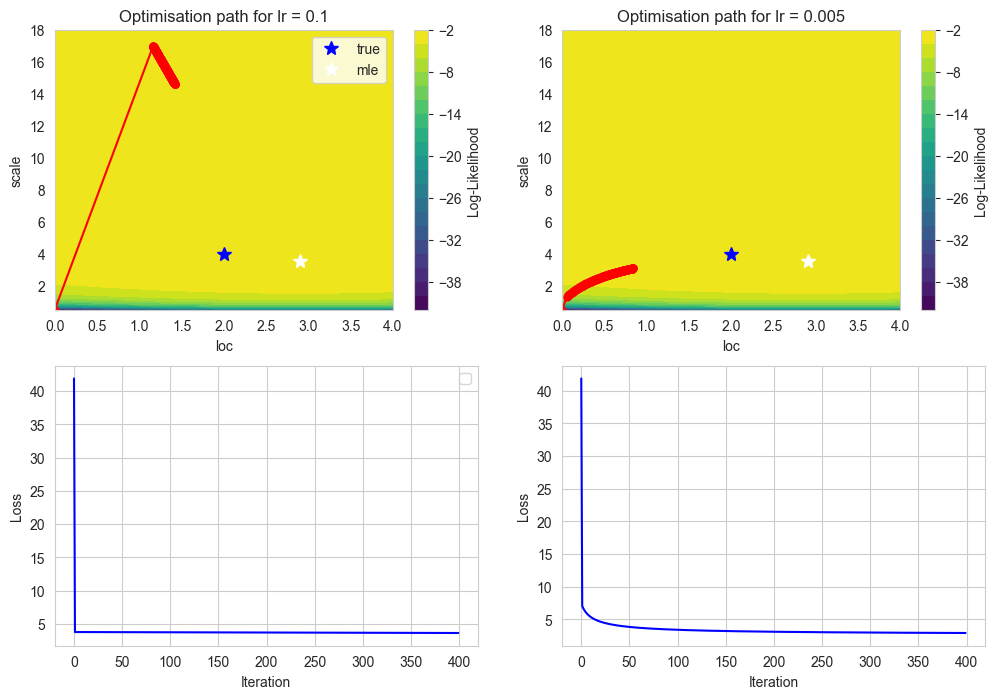

In [20]:
x = torch.tensor([0.0, 0.5])
# x = torch.tensor([0.0, 4.0])
# x = torch.tensor([1.5, 8.0])
plot_path(lr1= 1e-1, lr2 = 5e-3, num1 = 400, num2 = 400, x_start = x, marker = None,loc_range = None, scale_range = None)

In [81]:
# Using Multiple learning rates and 20 iterations
lrs = [1e-1, 5e-2, 2e-2, 1e-2, 5e-3, 2e-3, 1e-3, 5e-4,]
num_iters = [20, 20, 20, 20, 40, 40, 40, 40,]
dic = {}

for lr, num_iter in zip(lrs, num_iters):
    x = torch.tensor([0.0, 0.5])
    # x = torch.tensor([0.5, 4.0])
    xs, losses = optimiser(loss_fun, x, learning_rate = lr, num_iterations = num_iter)
    dic[lr] = (xs[-1][0], xs[-1][1], losses[-1])

results = pd.DataFrame.from_dict(dic, orient='index', columns=['Opt loc','Opt scale', 'loss'])
results

,Opt loc,Opt scale,loss
0.1000,1.173366,16.866873,3.771341
0.0500,0.608730,8.654540,3.194958
0.0200,0.298061,3.825205,2.916326
0.0100,0.212867,2.377896,3.522079
0.0050,0.239484,2.003952,4.041936
0.0020,0.157784,1.580810,5.366981
0.0010,0.109147,1.337221,6.861138
0.0005,0.073445,1.133616,8.986595


In [123]:
x = torch.tensor([0.1, 2.5])
xs, losses = optimiser(loss_fun, x, learning_rate = 0.020, num_iterations = 400)
print( "The final estimate for lr = 0.02: " ,xs[-1], "with final loss: ", [losses[-1]])
xs, losses = optimiser(loss_fun, x, learning_rate = 0.100, num_iterations = 400)
print( "The final estimate for lr = 0.1: " ,xs[-1], "with final loss: ", [losses[-1]])

print("MLE estimate for the mean: ", mean_mle, std_mle, "with loss: ", loss_fun(torch.tensor([mean_mle, std_mle])))

The final estimate for lr = 0.02:  [1.5146049 3.6886444] with final loss:  [2.7506263256073]
The final estimate for lr = 0.1:  [2.7874818 3.5309286] with final loss:  [2.677919626235962]
MLE estimate for the mean:  2.9060876 3.5198097 with loss:  tensor(2.6773)


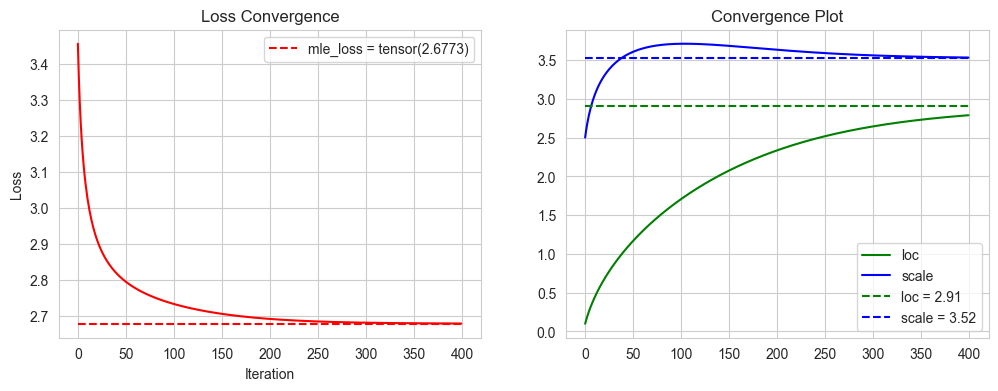

In [64]:
fig, ax = plt.subplots(1,2, figsize=(12,4))
ax[0].plot(losses2, color = 'red')
ax[0].set_xlabel('Iteration')
ax[0].set_ylabel('Loss')
ax[0].set_title('Loss Convergence')
ax[0].hlines(mle_loss, 0, len(losses2), color = "red", linestyle = "dashed", label = "mle_loss = " + str(mle_loss))
ax[0].legend()

# Plotting the path taken by theta during optimization
ax[1].plot([x[0] for x in xs2], color = "green", label = "loc")
ax[1].plot([x[1] for x in xs2], color = "blue", label = "scale")
ax[1].hlines(mean_mle, 0, len(losses2), color = "green", linestyle = "dashed", label = "loc = " + "{:.2f}".format(mean_mle.item()))
ax[1].hlines(std_mle, 0, len(losses2), color = "blue", linestyle = "dashed", label = "scale = " + "{:.2f}".format(std_mle.item()))
ax[1].legend()
ax[1].set_title('Convergence Plot')
plt.show()

### c) Log scale

In [65]:
# Defining the function to be optimized
data = true_samples

def sp_loss_fun(x):
    dist = torch.distributions.Normal(loc = x[0], scale = x[1].exp())
    return -dist.log_prob(data).mean()

def sp_log_likelihood(data, loc, scale):
    dist = torch.distributions.Normal(loc, scale.exp())
    return dist.log_prob(data).mean()

# Defining the function to be optimized
data = true_samples
def loss_fun(x):
    dist = torch.distributions.Normal(loc = x[0], scale = x[1])
    return -dist.log_prob(data).mean()

# The varaiable tensor, whose operations are to be stored x = [loc, log_scale]
x = torch.tensor([0.0, 0.5])

def optimiser(loss_fun, x_init, learning_rate, num_iterations):
    xs = []
    losses = []
    x = x_init.clone().requires_grad_(True)
    for i in range(num_iterations):
        loss = loss_fun(x)
        loss.backward()
        xs.append(x.detach().numpy().copy())
        losses.append(loss.item())
        x.data = x.data - learning_rate * x.grad
        x.grad.zero_()
    return xs, losses

def log_plot_path(lr1, lr2, num1, num2, x_start, loss_fun= loss_fun,marker = None,loc_range = None, log_scale_range = None):
    xs, losses = optimiser(sp_loss_fun, x_init = x_start, learning_rate = lr1, num_iterations = num1)
    xs2, losses2 = optimiser(sp_loss_fun, x_init = x_start, learning_rate = lr2, num_iterations = num2)

    if loc_range == None:
        loc_range = torch.linspace(0, 4, 100)
    if log_scale_range == None:
        log_scale_range = torch.linspace(np.log(0.2), np.log(1500), 100)
    loc_grid, scale_grid = torch.meshgrid(loc_range, log_scale_range)

    log_likelihood_grid = torch.zeros_like(loc_grid)
    for i in range(len(loc_range)):
        for j in range(len(log_scale_range)):
            log_likelihood_grid[i, j] = sp_log_likelihood(true_samples, loc_grid[i, j], scale_grid[i, j])

    # Plotting the loss curve
    fig, ax = plt.subplots(2,2, figsize=(12,8))

    contour = ax[0,0].contourf(loc_grid, scale_grid, log_likelihood_grid, levels=20, cmap='viridis')
    contour2 = ax[0,1].contourf(loc_grid, scale_grid, log_likelihood_grid, levels=20, cmap='viridis')
    plt.colorbar(contour, label='Log-Likelihood')
    plt.colorbar(contour2, label='Log-Likelihood')

    # Plotting the path taken by theta during optimization
    ax[0,0].plot([x[0] for x in xs], [x[1] for x in xs], marker='o', markersize=5, color = "red")
    ax[0,1].plot([x[0] for x in xs2], [x[1] for x in xs2], marker='o', markersize=5, color = "red")
    ax[0,0].set_xlabel('loc'); ax[0,1].set_xlabel('loc')
    ax[0,0].set_ylabel('log_scale'); ax[0,1].set_ylabel('log_scale')
    ax[0,0].set_title('Optimisation path for lr = '+ str(lr1)); ax[0,1].set_title('Optimisation path for lr = '+ str(lr2))

    # Markers
    ax[0,0].plot(true_loc, true_scale, 'b*', markersize=10, label = "true"); 
    ax[0,1].plot(true_loc, true_scale, 'b*', markersize=10, label = "true")
    ax[0,0].plot(mean_mle, np.log(std_mle), 'w*', markersize=10, label = "mle"); ax[0,0].legend()
    ax[0,1].plot(mean_mle, np.log(std_mle), 'w*', markersize=10, label = "mle"); ax[1,0].legend()
    # Plotting the loss curve
    ax[1,0].plot(losses, marker=marker, color = "blue")
    ax[1,0].set_xlabel('Iteration')
    ax[1,0].set_ylabel('Loss')
    ax[1,1].plot(losses2, marker=marker, color = "blue")
    ax[1,1].set_xlabel('Iteration')
    ax[1,1].set_ylabel('Loss')
    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


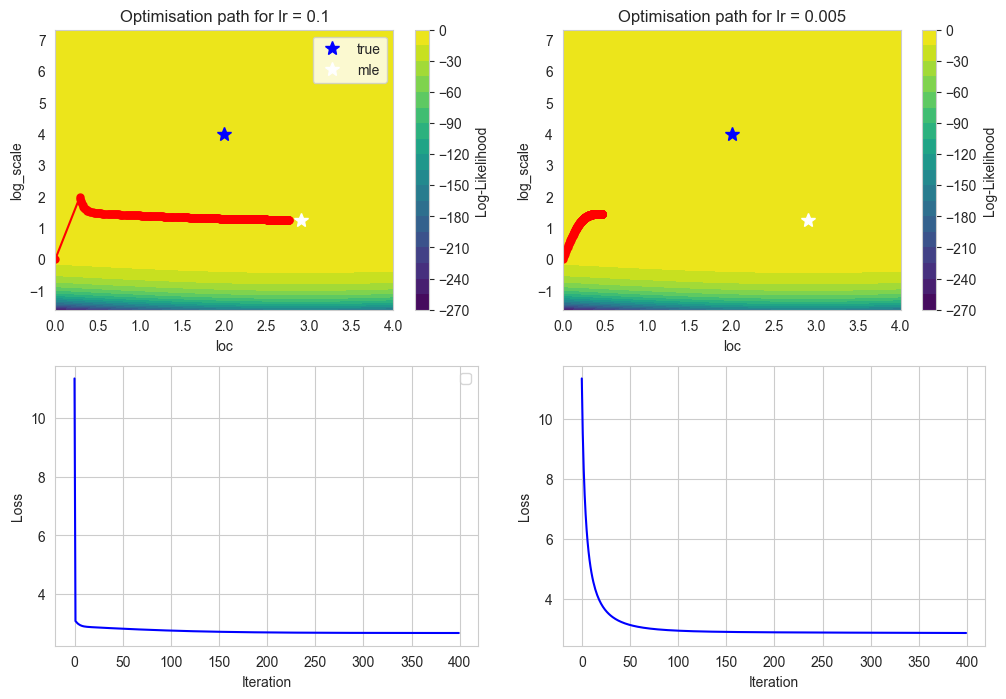

In [131]:
x = torch.tensor([0.0, np.log(1)])
# x = torch.tensor([0.0, 4.0])
# x = torch.tensor([1.5, 8.0])
log_plot_path(lr1= 1e-1, lr2 = 5e-3, num1 = 400, num2 = 400, x_start = x, marker = None,loc_range = None, log_scale_range = None)

In [67]:
x = torch.tensor([0.1, np.log(2.5)])
xs1, losses1 = optimiser(sp_loss_fun, x, learning_rate = 0.020, num_iterations = 400)
print( "The final estimate for lr = 0.02: " ,(xs1[-1][0], np.exp(xs1[-1][1])), "with final loss: ", [losses1[-1]])
xs2, losses2 = optimiser(sp_loss_fun, x, learning_rate = 0.100, num_iterations = 400)
print( "The final estimate for lr = 0.1: " ,(xs2[-1][0], np.exp(xs2[-1][1])), "with final loss: ", [losses2[-1]])

print("MLE estimate for the mean: ", mean_mle, std_mle, "with loss: ", loss_fun(torch.tensor([mean_mle, std_mle])))

The final estimate for lr = 0.02:  (1.1767749974131592, 3.947341294637169) with final loss:  [2.785501003265381]
The final estimate for lr = 0.1:  (2.7579340795986336, 3.523198082662908) with final loss:  [2.6782305240631104]
MLE estimate for the mean:  2.9060876 3.5198097 with loss:  tensor(2.6773)


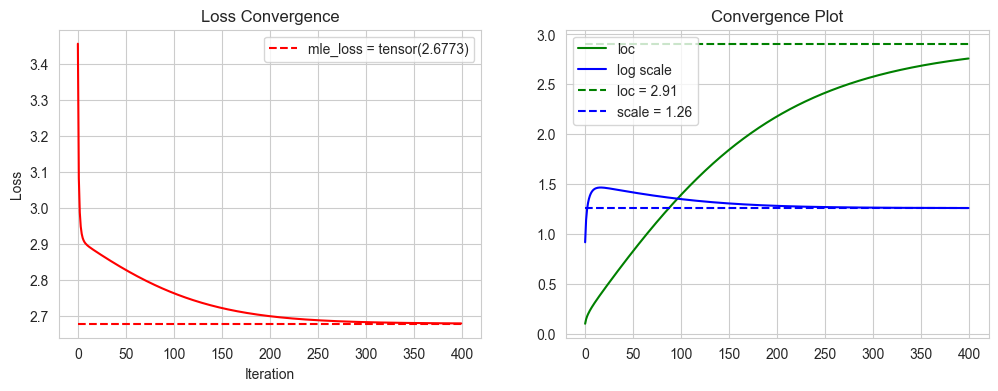

In [71]:
fig, ax = plt.subplots(1,2, figsize=(12,4))
ax[0].plot(losses2, color = 'red')
ax[0].set_xlabel('Iteration')
ax[0].set_ylabel('Loss')
ax[0].set_title('Loss Convergence')
ax[0].hlines(mle_loss, 0, len(losses2), color = "red", linestyle = "dashed", label = "mle_loss = " + str(mle_loss))
ax[0].legend()

# Plotting the path taken by theta during optimization
ax[1].plot([x[0] for x in xs2], color = "green", label = "loc")
ax[1].plot([x[1] for x in xs2], color = "blue", label = "log scale")
ax[1].hlines(mean_mle, 0, len(losses2), color = "green", linestyle = "dashed", label = "loc = " + "{:.2f}".format(mean_mle.item()))
ax[1].hlines(np.log(std_mle), 0, len(losses2), color = "blue", linestyle = "dashed", label = "scale = " + "{:.2f}".format(np.log(std_mle.item())))
ax[1].legend()
ax[1].set_title('Convergence Plot')
plt.show()

Why does optimising scale on logarithmic scale help? In this particular function it is because the scale factor varies in a logarithmic scale rather than on a linear scale. Evident by the contour plotof the function and its formulae.

$$
logloss = \sum_{i=1}^{n} -log(\sigma \sqrt{2\pi}) + \frac{(y_i - \mu)^2}{2\sigma^2}
$$

The logarithmic scale for the scale parameter helps to make it linear .

---

### Q3

Generate some data (1000 data points) using a univariate Normal distribution with loc=2.0 and scale=4.0 and using Student-T distributions with varying degrees (from 1-8) of freedom (1000 data points corresponding to each degree of freedom). Plot the pdf (and logpdf) at uniformly spaced data from (-50, 50) in steps of 0.1. What can you conclude? [1 mark]

---

In [1]:
# Generating the Data
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.distributions as dist

torch.manual_seed(17)
normal_loc = 2.0
normal_scale = 4.0
normal_data = np.random.normal(normal_loc, normal_scale, 1000)

# Generate data from Student-T distributions with varying degrees of freedom
degrees_of_freedom = range(1, 9)
student_t_data = []
for df in degrees_of_freedom:
    student_t_dist = dist.StudentT(df, normal_loc, normal_scale)
    student_t_data.append(student_t_dist.sample([1000]).numpy().flatten())

[]

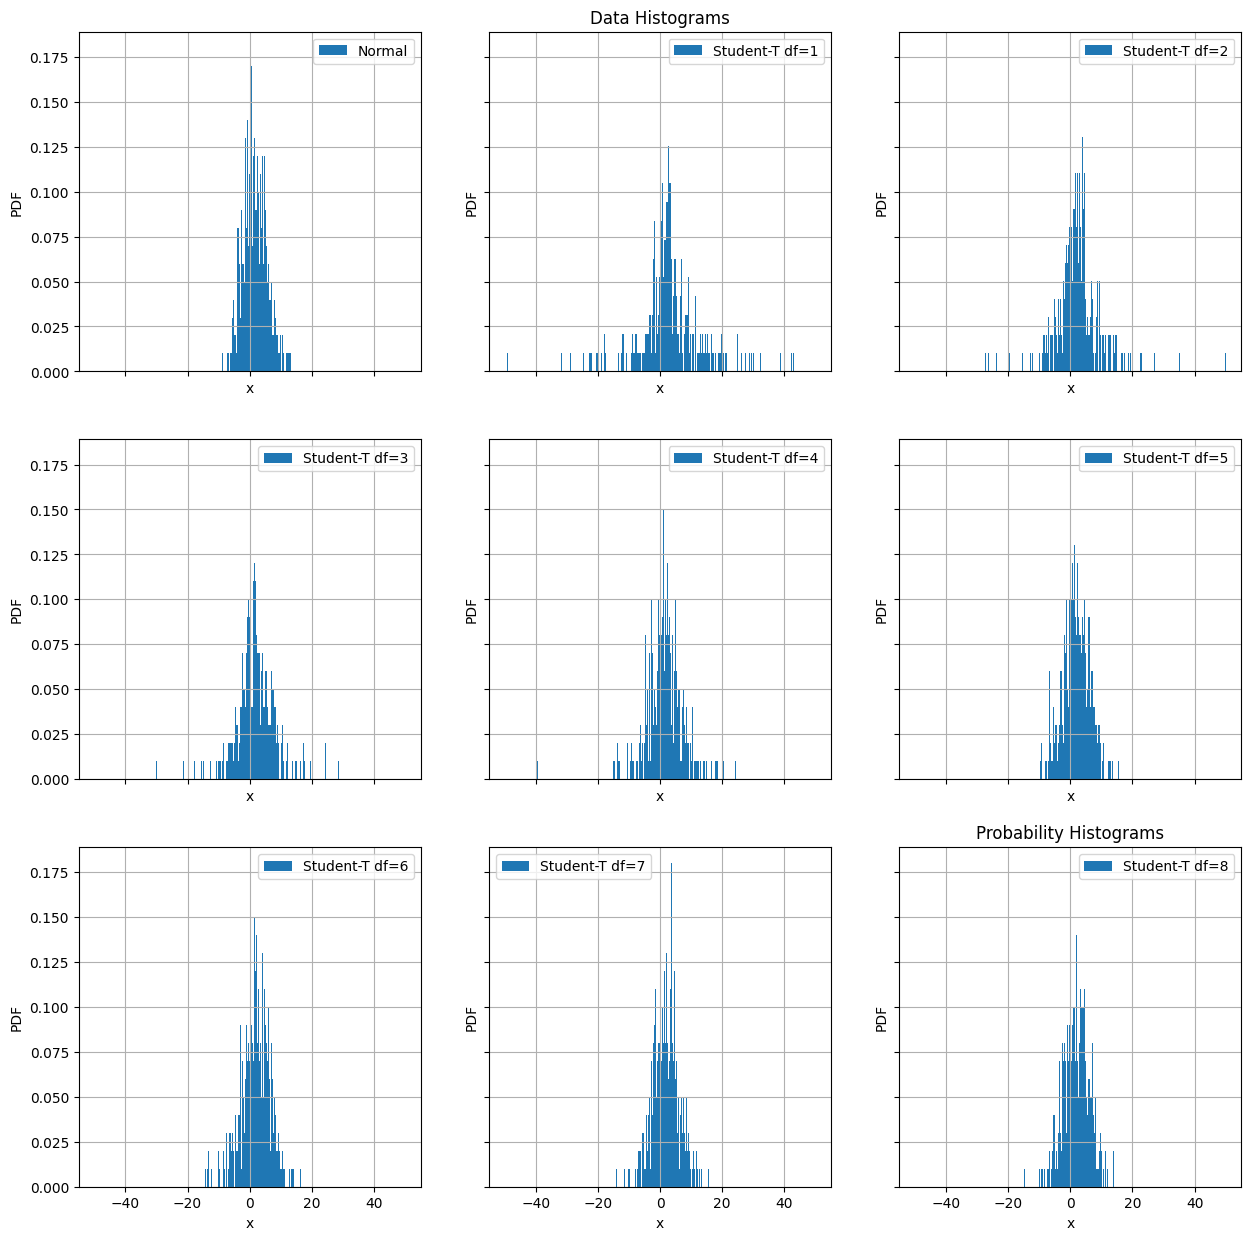

In [3]:
# Plot the histograms of the data # Does not work with seaborn
fig, ax = plt.subplots(3, 3, figsize=(15, 15), sharey = True, sharex = True)
plt.title("Probability Histograms")
ax[0,0].set_xlabel("x")
ax[0,0].set_ylabel("PDF")

x_values = np.arange(-50, 50, 0.1)

ax[0,0].hist(normal_data, density=True, label="Normal", range = (-50,50), bins = 1000)
ax[0,0].legend();  ax[0,0].grid()

for df, student_t_samples in zip(degrees_of_freedom, student_t_data):
    row = (df)//3
    col = (df)%3
    ax[row, col].hist(student_t_samples, density=True, label=f"Student-T df={df}", range = (-50,50), bins = 1000)
    ax[row, col].legend(); ax[row, col].grid()
    ax[row, col].set_xlabel("x")
    ax[row, col].set_ylabel("PDF")
ax[0,1].set_title("Data Histograms")

plt.plot()

[]

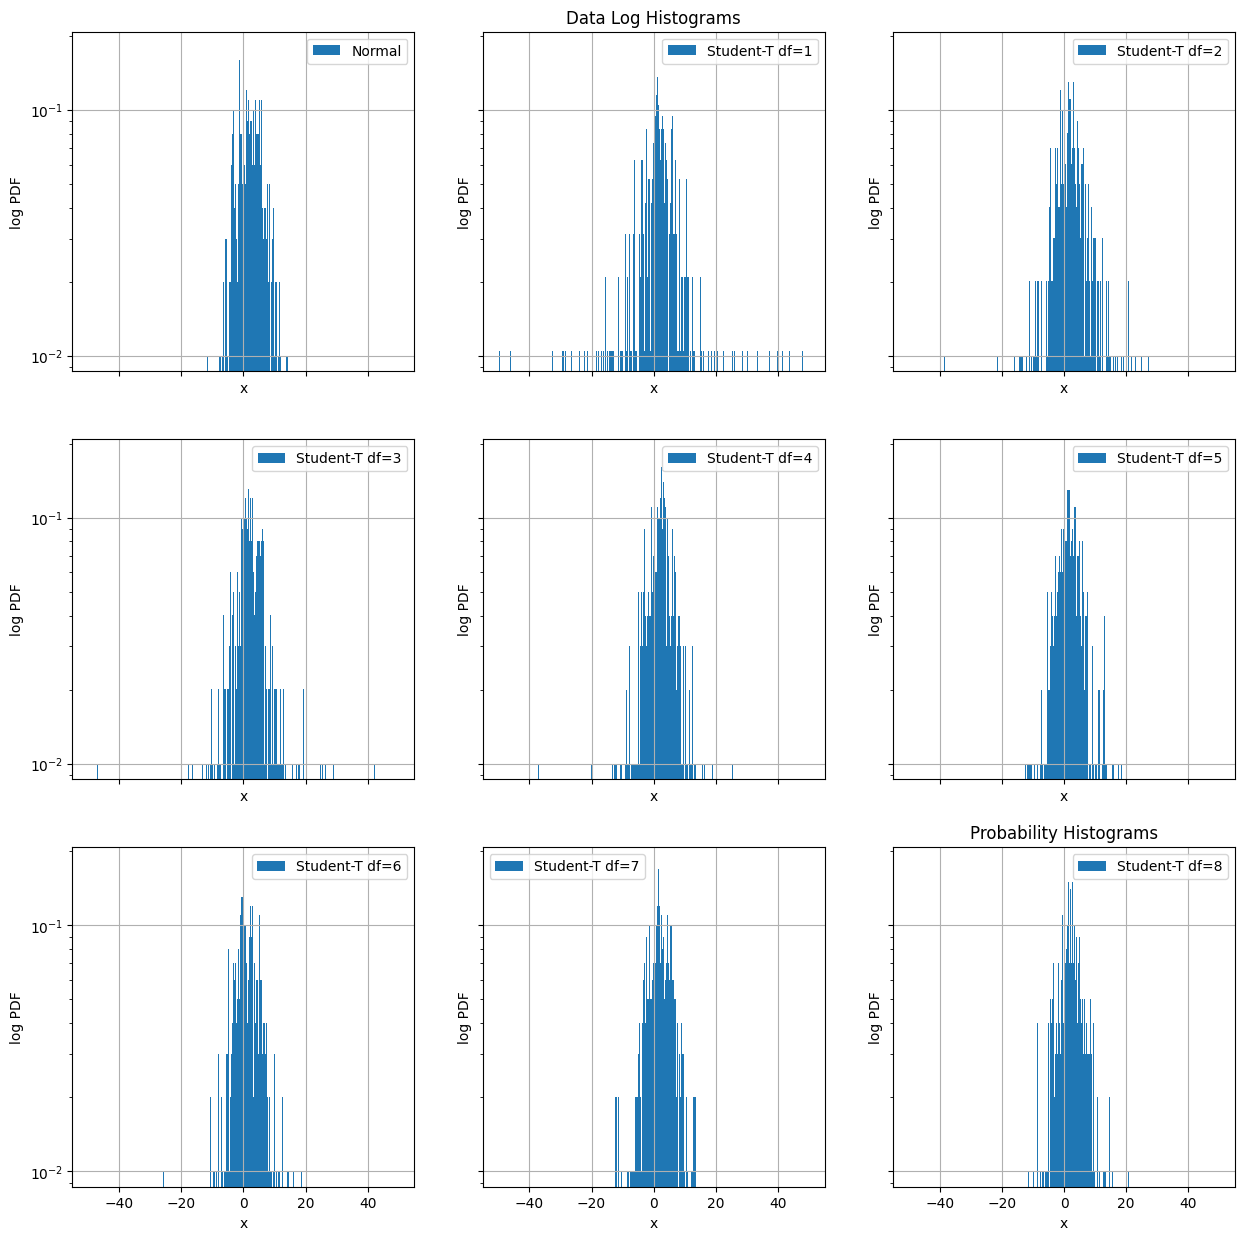

In [4]:
# Plot the histograms of the data
fig, ax = plt.subplots(3, 3, figsize=(15, 15), sharey = True, sharex = True)
plt.title("Probability Histograms")
ax[0,0].set_xlabel("x")
ax[0,0].set_ylabel("log PDF")

x_values = np.arange(-50, 50, 0.1)

ax[0,0].hist(normal_data, density=True, label="Normal", range = (-50,50), bins = 1000)
ax[0,0].legend(); ax[0,0].grid()

for df, student_t_samples in zip(degrees_of_freedom, student_t_data):
    row = (df)//3
    col = (df)%3
    ax[row, col].hist(student_t_samples, density=True, label=f"Student-T df={df}", range = (-50,50), bins = 1000, log = True)
    ax[row, col].legend(); ax[row, col].grid()
    ax[row, col].set_xlabel("x")
    ax[row, col].set_ylabel("log PDF")
    
ax[0,1].set_title("Data Log Histograms")

plt.plot()

---
## Conclusion:

From this we can conclude that the student t distibution approaches (becomes more like) the normal distribution on increasint the value of the degrees of freedom.

Also:

$$
p(t) \propto \biggl(1 + \frac{t^2}{v} \biggr)^{-\frac{v+1}{2}}
$$

where $v$ is the degrees of freedom.

also:

$$
\lim_{x \to a} (1 + f(x))^{g(x)} = e^{\lim_{x \to a} f(x)g(x)} \; if \; \lim_{x \to a} f(x) = 0 \; and \; \lim_{x \to a} g(x) = \infty
$$

Hense, for large values of $v$ we can approximate the student t distribution as:

$$
p(t) \propto \biggl(1 + \frac{t^2}{v} \biggr)^{-\frac{v+1}{2}} \approx e^{-\frac{t^2}{2}}
$$

Which is the normal distribution.

Also, for $v = 1$, the student t distribution is the Cauchy distribution.

$$
p(t) = \frac{1}{\pi} \frac{1}{1 + t^2}
$$

---

### Q4

Analytically derive the MLE for exponential distribution. Generate some data (1000 data points) using some fixed parameter values and see if you can recover the analytical parameters using gradient descent based solution for obtaining MLE. [1 mark]

### A4:

The probability density function of exponential distribution is given by:

$$f(x) = \lambda e^{-\lambda x}$$

The likelihood function is given by:

$$L(\lambda) = \prod_{i=1}^{n} \lambda e^{-\lambda x_i}$$

$$L(\lambda) = \lambda^n e^{-\lambda \sum_{i=1}^{n} x_i}$$

$$\ln L(\lambda) = n \ln \lambda - \lambda \sum_{i=1}^{n} x_i$$

$$\frac{\partial \ln L(\lambda)}{\partial \lambda} = \frac{n}{\lambda} - \sum_{i=1}^{n} x_i$$

$$\frac{\partial^2 \ln L(\lambda)}{\partial \lambda^2} = -\frac{n}{\lambda^2}$$

The MLE is obtained by equating the first derivative to zero:

$$\frac{n}{\lambda} - \sum_{i=1}^{n} x_i = 0$$

$$\lambda = \frac{n}{\sum_{i=1}^{n} x_i}$$

The second derivative is negative, so the MLE is a maximum.

In the following code, we generate 1000 data points from an exponential distribution with $\lambda = 0.5$ and then use gradient descent to find the MLE of $\lambda$.


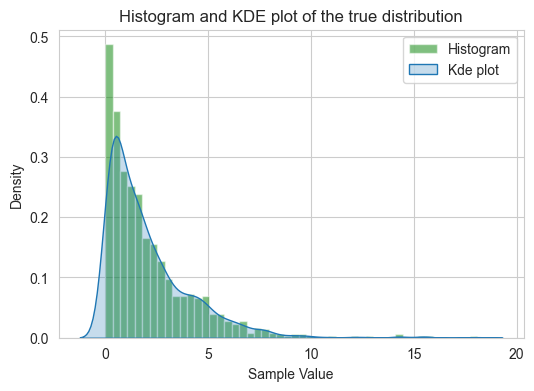

In [21]:
import torch.distributions as dist
torch.manual_seed(17)

# Generating data from a exponential Distribution
true_lamb = 0.5

true_dist = dist.Exponential(true_lamb)
true_samples = true_dist.sample((1000,))
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.hist(true_samples.numpy(),density=True, color = "green", alpha = 0.5, bins = 50, label = "Histogram")
sns.kdeplot(true_samples.numpy(), bw_adjust=0.75, fill=True, ax=ax, label = "Kde plot")
ax.set_title("Histogram and KDE plot of the true distribution")
ax.set_xlabel("Sample Value")
ax.legend()
plt.show()

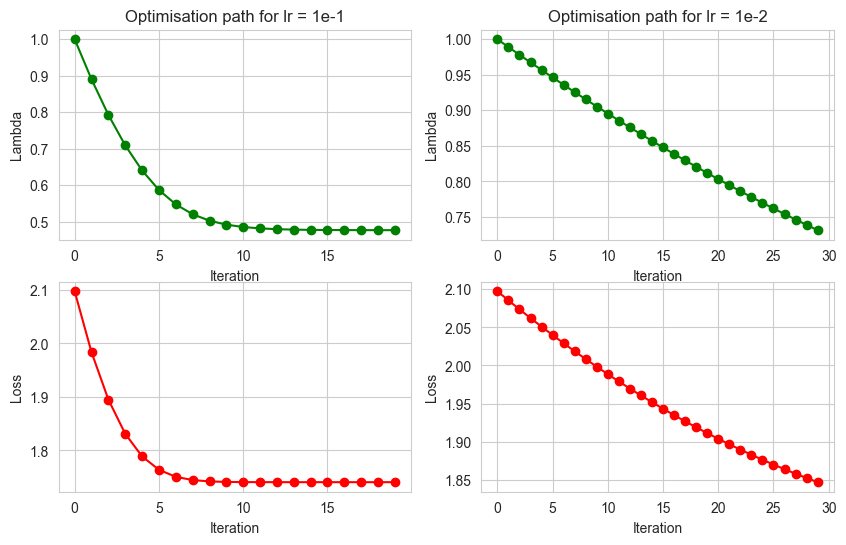

In [22]:
# Defining the function to be optimized
data = true_samples
def loss_fun(x):
    distr = dist.Exponential(x)
    return -distr.log_prob(data).mean()

# The varaiable tensor, whose operations are to be stored, x = lambda
x = torch.tensor([1.0])

xs, losses = optimiser(loss_fun, x, learning_rate = 1e-1, num_iterations = 20)
xs2, losses2 = optimiser(loss_fun, x, learning_rate = 1e-2, num_iterations = 30)

loc_range = torch.linspace(0, 4, 100)
scale_range = torch.linspace(0.5, 18, 100)
loc_grid, scale_grid = torch.meshgrid(loc_range, scale_range)

# Plotting the loss curve
fig, ax = plt.subplots(2,2, figsize=(10,6))

# Plotting the path taken by theta during optimization
ax[0,0].plot(xs, marker='o', color = "green")
ax[0,1].plot(xs2, marker='o', color = "green")
ax[0,0].set_xlabel('Iteration'); ax[0,1].set_xlabel('Iteration')
ax[0,0].set_ylabel('Lambda'); ax[0,1].set_ylabel('Lambda')
ax[0,0].set_title('Optimisation path for lr = 1e-1'); ax[0,1].set_title('Optimisation path for lr = 1e-2')

# Plotting the loss curve
ax[1,0].plot(losses, marker='o', color = "red")
ax[1,0].set_xlabel('Iteration')
ax[1,0].set_ylabel('Loss')
ax[1,1].plot(losses2, marker='o', color = "red")
ax[1,1].set_xlabel('Iteration')
ax[1,1].set_ylabel('Loss')
plt.show()

In [68]:
# Analytically Calculated Lambda:-
print("Analytically Calculated Lambda:-", "{:.5f}".format(1/np.mean(true_samples.numpy())) )

Analytically Calculated Lambda:- 0.47678


In [66]:
# Using Multiple learning rates and 20 iterations
lrs = [1e-1, 5e-2, 2e-2, 1e-2, 5e-3, 2e-3]
num_iters = [20, 20, 20, 20, 40, 40]
dic = {}

for lr, num_iter in zip(lrs, num_iters):
    x = torch.tensor([1.0])
    xs, losses = optimiser(loss_fun, x, learning_rate = lr, num_iterations = num_iter)
    dic[lr] = (xs[-1].item(), losses[-1])

results = pd.DataFrame.from_dict(dic, orient='index', columns=['Opt lamb','loss'])
results

,Opt lamb,loss
0.100,0.476827,1.740704
0.050,0.493872,1.741331
0.020,0.668664,1.804937
0.010,0.811700,1.911093
0.005,0.807884,1.907801
0.002,0.917757,2.010736


---

### Q5

Generate some data (100 data points) using a univariate Normal distribution with loc=2.0 and scale=4.0. Now, create datasets of size 10, 20, 50, 100, 500, 1000, 5000, 10000. We will use a different random seed to create ten different datasets for each of these sizes. For each of these datasets, find the MLE parameters for the loc and scale using gradient descent. Plot the estimates of loc and scale as a function of the dataset size. What can you conclude? [1 mark]

We will be using learning rate = 0.10 and 1000 iterations for gradient descent.

In [10]:
from tqdm import tqdm
# Generating the data and calculating the mean and varaince of the data
true_loc = 2.0
true_scale = 4.0
learning_rate = 0.020
num_iterations = 400
x = torch.tensor([0.0, 2.0])

# Generating the data
sizes = [10, 20, 50, 100, 500, 1000, 5000, 10000]
Estimates = {}
for j in sizes:
    Estimates[j] = []

true_dist = dist.Normal(true_loc, true_scale)

for i in tqdm(range(10)):
    for j in sizes:
        torch.manual_seed(i+j)
        true_samples = true_dist.sample((j,))

        def new_loss_fun(x):
            dist = torch.distributions.Normal(loc = x[0], scale = x[1])
            return -dist.log_prob(true_samples).mean()

        xs, losses = optimiser(new_loss_fun, x, learning_rate = 0.10, num_iterations = 1000)
        Estimates[j].append([xs[-1][0], xs[-1][1]])


100%|██████████| 10/10 [00:21<00:00,  2.18s/it]


In [12]:
mean_estimates = {}
for j in sizes:
    mean_estimates[j] = []
    loc_list = []; std_list = []
    for i in range(10):
        loc_list.append(Estimates[j][i][0])
        std_list.append(Estimates[j][i][1])
    mean_estimates[j].append(np.mean(np.array(loc_list)))
    mean_estimates[j].append(np.std(np.array(loc_list)))
    mean_estimates[j].append(np.mean(np.array(std_list)))
    mean_estimates[j].append(np.std(np.array(std_list)))

df = pd.DataFrame(mean_estimates, index = ['loc', 'std_loc', 'std', 'std_std'])
print(df)

            10        20        50        100       500       1000      5000   \
loc      1.585901  2.543690  2.257605  1.714851  1.995445  2.025935  2.048942   
std_loc  1.089790  0.527336  0.525339  0.472802  0.210362  0.067069  0.048850   
std      3.692294  3.744772  4.056615  3.916501  4.017087  3.973100  4.012889   
std_std  0.704695  0.439621  0.420956  0.208079  0.135794  0.084302  0.034018   

            10000  
loc      1.985947  
std_loc  0.048535  
std      4.003768  
std_std  0.021502  


In [13]:
np.array(df.loc["loc"])

array([1.5859007, 2.5436902, 2.257605 , 1.7148511, 1.9954453, 2.0259354,
       2.0489419, 1.985947 ], dtype=float32)

Text(0.5, 1.0, 'Scale vs Sample size')

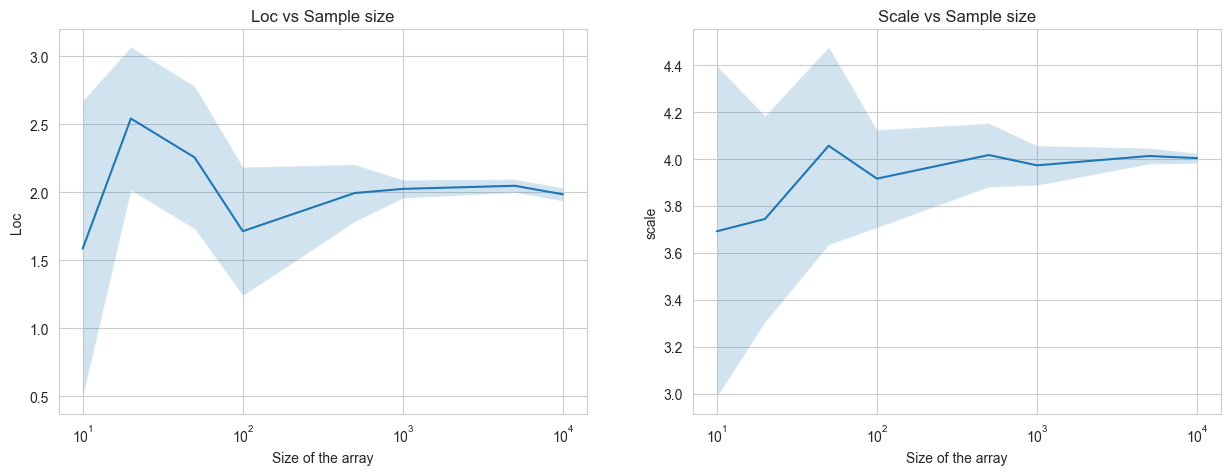

In [14]:
## Plotting the relation

fig, ax = plt.subplots(1,2 , figsize=(15, 5))

npsizes = np.array(sizes); nploc = np.array(df.loc["loc"]); npstdloc = np.array(df.loc["std_loc"])
ax[0].plot(npsizes, nploc, "-")
ax[0].set_xlabel("Size of the array")
ax[0].set_ylabel("Loc")
ax[0].fill_between(npsizes, nploc - npstdloc, nploc + npstdloc, alpha=0.2)
ax[0].set_xscale("log"); ax[0].set_title("Loc vs Sample size")

npstd = np.array(df.loc["std"]); npstdstd = np.array(df.loc["std_std"])
ax[1].plot(npsizes, npstd, "-")
ax[1].set_xlabel("Size of the array")
ax[1].set_ylabel("scale")
ax[1].fill_between(npsizes, npstd - npstdstd, npstd + npstdstd, alpha=0.2)
ax[1].set_xscale("log"); ax[1].set_title("Scale vs Sample size")

---

## Conclusion:-

The variance of the calculated maximum likelihood parameters keeps on decreasing. With more data points, the optimization process has more information to work with, leading to more precise parameter estimates. This experiment demonstrates the importance of having larger datasets for accurate parameter estimation.



In [22]:
Mle_Estimates = {}
for j in sizes:
    Mle_Estimates[j] = []

for i in tqdm(range(10)): # tqdm(range(10))
    for j in sizes:
        torch.manual_seed(i+j)
        true_samples = true_dist.sample((j,))
        Mle_Estimates[j].append([np.mean(true_samples.numpy()), np.std(true_samples.numpy())]) # Can directly add the MLE mean and variance

100%|██████████| 10/10 [00:00<00:00, 274.53it/s]


In [24]:
mean_estimates = {}
for j in sizes:
    mean_estimates[j] = []
    loc_list = []; std_list = []
    for i in range(10):
        loc_list.append(Mle_Estimates[j][i][0])
        std_list.append(Mle_Estimates[j][i][1])
    mean_estimates[j].append(np.mean(np.array(loc_list)))
    mean_estimates[j].append(np.std(np.array(loc_list)))
    mean_estimates[j].append(np.mean(np.array(std_list)))
    mean_estimates[j].append(np.std(np.array(std_list)))

mle_df = pd.DataFrame(mean_estimates, index = ['loc', 'std_loc', 'std', 'std_std'])
print(mle_df)

            10        20        50        100       500       1000      5000   \
loc      1.587280  2.547516  2.264383  1.717096  1.998758  2.028804  2.052149   
std_loc  1.090006  0.529892  0.528146  0.473433  0.210745  0.067324  0.048987   
std      3.692424  3.744733  4.056543  3.916490  4.017070  3.973086  4.012873   
std_std  0.705049  0.439590  0.420899  0.208075  0.135787  0.084298  0.034013   

            10000  
loc      1.988941  
std_loc  0.048690  
std      4.003751  
std_std  0.021498  


Text(0.5, 1.0, 'Scale vs Sample size')

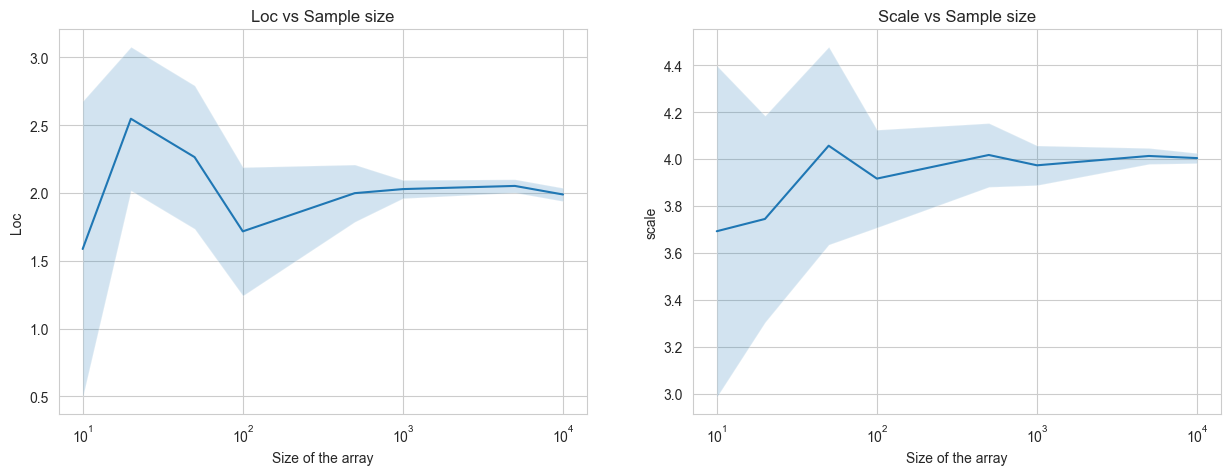

In [25]:
## Plotting the relation

fig, ax = plt.subplots(1,2 , figsize=(15, 5))

npsizes = np.array(sizes); nploc = np.array(mle_df.loc["loc"]); npstdloc = np.array(mle_df.loc["std_loc"])
ax[0].plot(npsizes, nploc, "-")
ax[0].set_xlabel("Size of the array")
ax[0].set_ylabel("Loc")
ax[0].fill_between(npsizes, nploc - npstdloc, nploc + npstdloc, alpha=0.2)
ax[0].set_xscale("log"); ax[0].set_title("Loc vs Sample size")

npstd = np.array(mle_df.loc["std"]); npstdstd = np.array(mle_df.loc["std_std"])
ax[1].plot(npsizes, npstd, "-")
ax[1].set_xlabel("Size of the array")
ax[1].set_ylabel("scale")
ax[1].fill_between(npsizes, npstd - npstdstd, npstd + npstdstd, alpha=0.2)
ax[1].set_xscale("log"); ax[1].set_title("Scale vs Sample size")